## Mutation

### Polynomial Mutation (PM)

Details about the mutation can be found in <cite data-cite="sbx"></cite>. This mutation follows the same probability distribution as the simulated binary crossover.

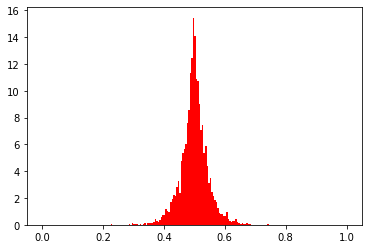

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from pymoo.core.population import Population
from pymoo.core.problem import Problem
from pymoo.operators.mutation.pm import PolynomialMutation


def show(eta_mut):
    problem = Problem(n_var=1, xl=0.0, xu=1.0)

    X = np.full((5000, 1), 0.5)
    pop = Population.new(X=X)

    mutation = PolynomialMutation(prob=1.0, eta=eta_mut)

    off = mutation(problem, pop)
    Xp = off.get("X")

    plt.hist(Xp, range=(0.0, 1.0), bins=200, density=True, color="red")
    plt.show()


show(30)



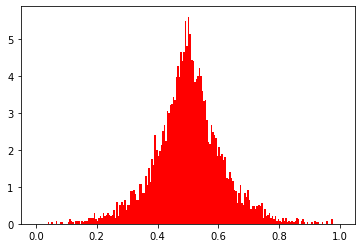

In [2]:
show(10)

Basically, the same can be applied to discrete variables as well: 

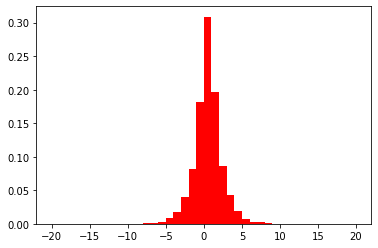

In [3]:
import matplotlib.pyplot as plt
import numpy as np

from pymoo.core.population import Population
from pymoo.core.problem import Problem
from pymoo.operators.mutation.pm import PolynomialMutation
from pymoo.operators.repair.rounding import RoundingRepair


def show(eta_mut):
    problem = Problem(n_var=1, xl=-20, xu=20)

    X = np.full((5000, 1), 0.0)
    pop = Population.new(X=X)

    mutation = PolynomialMutation(prob=1.0, eta=eta_mut, repair=RoundingRepair())

    off = mutation(problem, pop)
    Xp = off.get("X")

    plt.hist(Xp, range=(-20, 20), bins=40, density=True, color="red")
    plt.show()


show(30)


### Bitflip Mutation (BM)

The bitlip mutation randomly flips a bit.

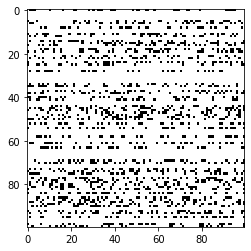

In [4]:
import matplotlib.pyplot as plt
import numpy as np

from pymoo.core.population import Population
from pymoo.core.problem import Problem
from pymoo.operators.mutation.bitflip import BitflipMutation

n_var, n_matings = 100, 50

problem = Problem(n_var=n_var, vtype=bool)

X = np.full((100, 100), False)
pop = Population.new(X=X)

mutation = BitflipMutation(prob=0.5, prob_var=0.3)
Xp = mutation(problem, pop).get("X")

plt.figure(figsize=(4, 4))
plt.imshow(X != Xp, cmap='Greys', interpolation='nearest')
plt.show()

### API